<a href="https://colab.research.google.com/github/LOVELYVD/AURDINO/blob/main/ML_TECHNIQUES_IN__TRADB_FILE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [19]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [20]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/ae_db/tr_data.csv')

In [11]:
df.head()

,SetID,Time,TRAI,Status,ParamID,Chan,Pretrigger,Thr,SampleRate,Samples,DataFormat,Data
0,1,0,1,0,2,1,0,0,2000000,1024,2,fLaC�
1,2,0,2,0,2,2,0,0,2000000,1024,2,fLaC�
2,3,1024,3,0,2,1,0,0,2000000,1024,2,fLaC�
3,4,1024,4,0,2,2,0,0,2000000,1024,2,fLaC�
4,5,2048,5,0,2,1,0,0,2000000,1024,2,fLaC�


In [12]:
df.shape

(218861, 12)

In [ ]:
print(df['Time'].unique())
print(df['TRAI'].unique())
print(df['Status'].unique())
print(df['Chan'].unique())
print(df['SampleRate'].unique())
print(df['ParamID'].unique())
print(df['Pretrigger'].unique())
print(df['Thr'].unique())
print(df['Samples'].unique())





In [14]:
df.isnull().sum()

SetID         0
Time          0
TRAI          0
Status        0
ParamID       0
Chan          0
Pretrigger    0
Thr           0
SampleRate    0
Samples       0
DataFormat    0
Data          0
dtype: int64

In [15]:
df.describe()


,SetID,Time,TRAI,Status,ParamID,Chan,Pretrigger,Thr,SampleRate,Samples,DataFormat
count,218861.00000,2.188610e+05,218861.00000,218861.0,218861.0,218861.000000,218861.0,218861.0,218861.0,218861.0,218861.0
mean,109431.00000,5.798929e+07,109431.00000,0.0,2.0,1.499998,0.0,0.0,2000000.0,1024.0,2.0
std,63179.87297,3.241306e+07,63179.87297,0.0,0.0,0.500001,0.0,0.0,0.0,0.0,0.0
min,1.00000,0.000000e+00,1.00000,0.0,2.0,1.000000,0.0,0.0,2000000.0,1024.0,2.0
25%,54716.00000,3.001254e+07,54716.00000,0.0,2.0,1.000000,0.0,0.0,2000000.0,1024.0,2.0
50%,109431.00000,5.802714e+07,109431.00000,0.0,2.0,1.000000,0.0,0.0,2000000.0,1024.0,2.0
75%,164146.00000,8.604070e+07,164146.00000,0.0,2.0,2.000000,0.0,0.0,2000000.0,1024.0,2.0
max,218861.00000,1.140553e+08,218861.00000,0.0,2.0,2.000000,0.0,0.0,2000000.0,1024.0,2.0


In [16]:
final_dataset=df[['SetID','Time','TRAI','Status','ParamID','Chan','Pretrigger','Thr','SampleRate','Samples','DataFormat']]

In [17]:
final_dataset.head()

,SetID,Time,TRAI,Status,ParamID,Chan,Pretrigger,Thr,SampleRate,Samples,DataFormat
0,1,0,1,0,2,1,0,0,2000000,1024,2
1,2,0,2,0,2,2,0,0,2000000,1024,2
2,3,1024,3,0,2,1,0,0,2000000,1024,2
3,4,1024,4,0,2,2,0,0,2000000,1024,2
4,5,2048,5,0,2,1,0,0,2000000,1024,2


In [18]:
pd.options.display.TRAI = 12

OptionError: ignored

In [70]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [71]:
final_dataset.head()

,SetID,Time,TRAI,Status,ParamID,Chan,Pretrigger,Thr,SampleRate,DataFormat,CurrentSamples,n0_samples
0,1,0,1,0,2,1,0,0,2000000,2,1024,0
1,2,0,2,0,2,2,0,0,2000000,2,1024,0
2,3,1024,3,0,2,1,0,0,2000000,2,1024,0
3,4,1024,4,0,2,2,0,0,2000000,2,1024,0
4,5,2048,5,0,2,1,0,0,2000000,2,1024,0


In [73]:
final_dataset.drop(['n0_samples'],axis=1,inplace=True)
final_dataset.head()

,SetID,Time,TRAI,Status,ParamID,Chan,Pretrigger,Thr,SampleRate,DataFormat,CurrentSamples
0,1,0,1,0,2,1,0,0,2000000,2,1024
1,2,0,2,0,2,2,0,0,2000000,2,1024
2,3,1024,3,0,2,1,0,0,2000000,2,1024
3,4,1024,4,0,2,2,0,0,2000000,2,1024
4,5,2048,5,0,2,1,0,0,2000000,2,1024


In [74]:
final_dataset.corr()

,SetID,Time,TRAI,Status,ParamID,Chan,Pretrigger,Thr,SampleRate,DataFormat,CurrentSamples
SetID,1.000000e+00,0.999967,1.000000e+00,NaN,NaN,1.520694e-18,NaN,NaN,NaN,NaN,NaN
Time,9.999669e-01,1.000000,9.999669e-01,NaN,NaN,-7.903369e-06,NaN,NaN,NaN,NaN,NaN
TRAI,1.000000e+00,0.999967,1.000000e+00,NaN,NaN,1.520694e-18,NaN,NaN,NaN,NaN,NaN
Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ParamID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chan,1.520694e-18,-0.000008,1.520694e-18,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN
Pretrigger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SampleRate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DataFormat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
import seaborn as sns

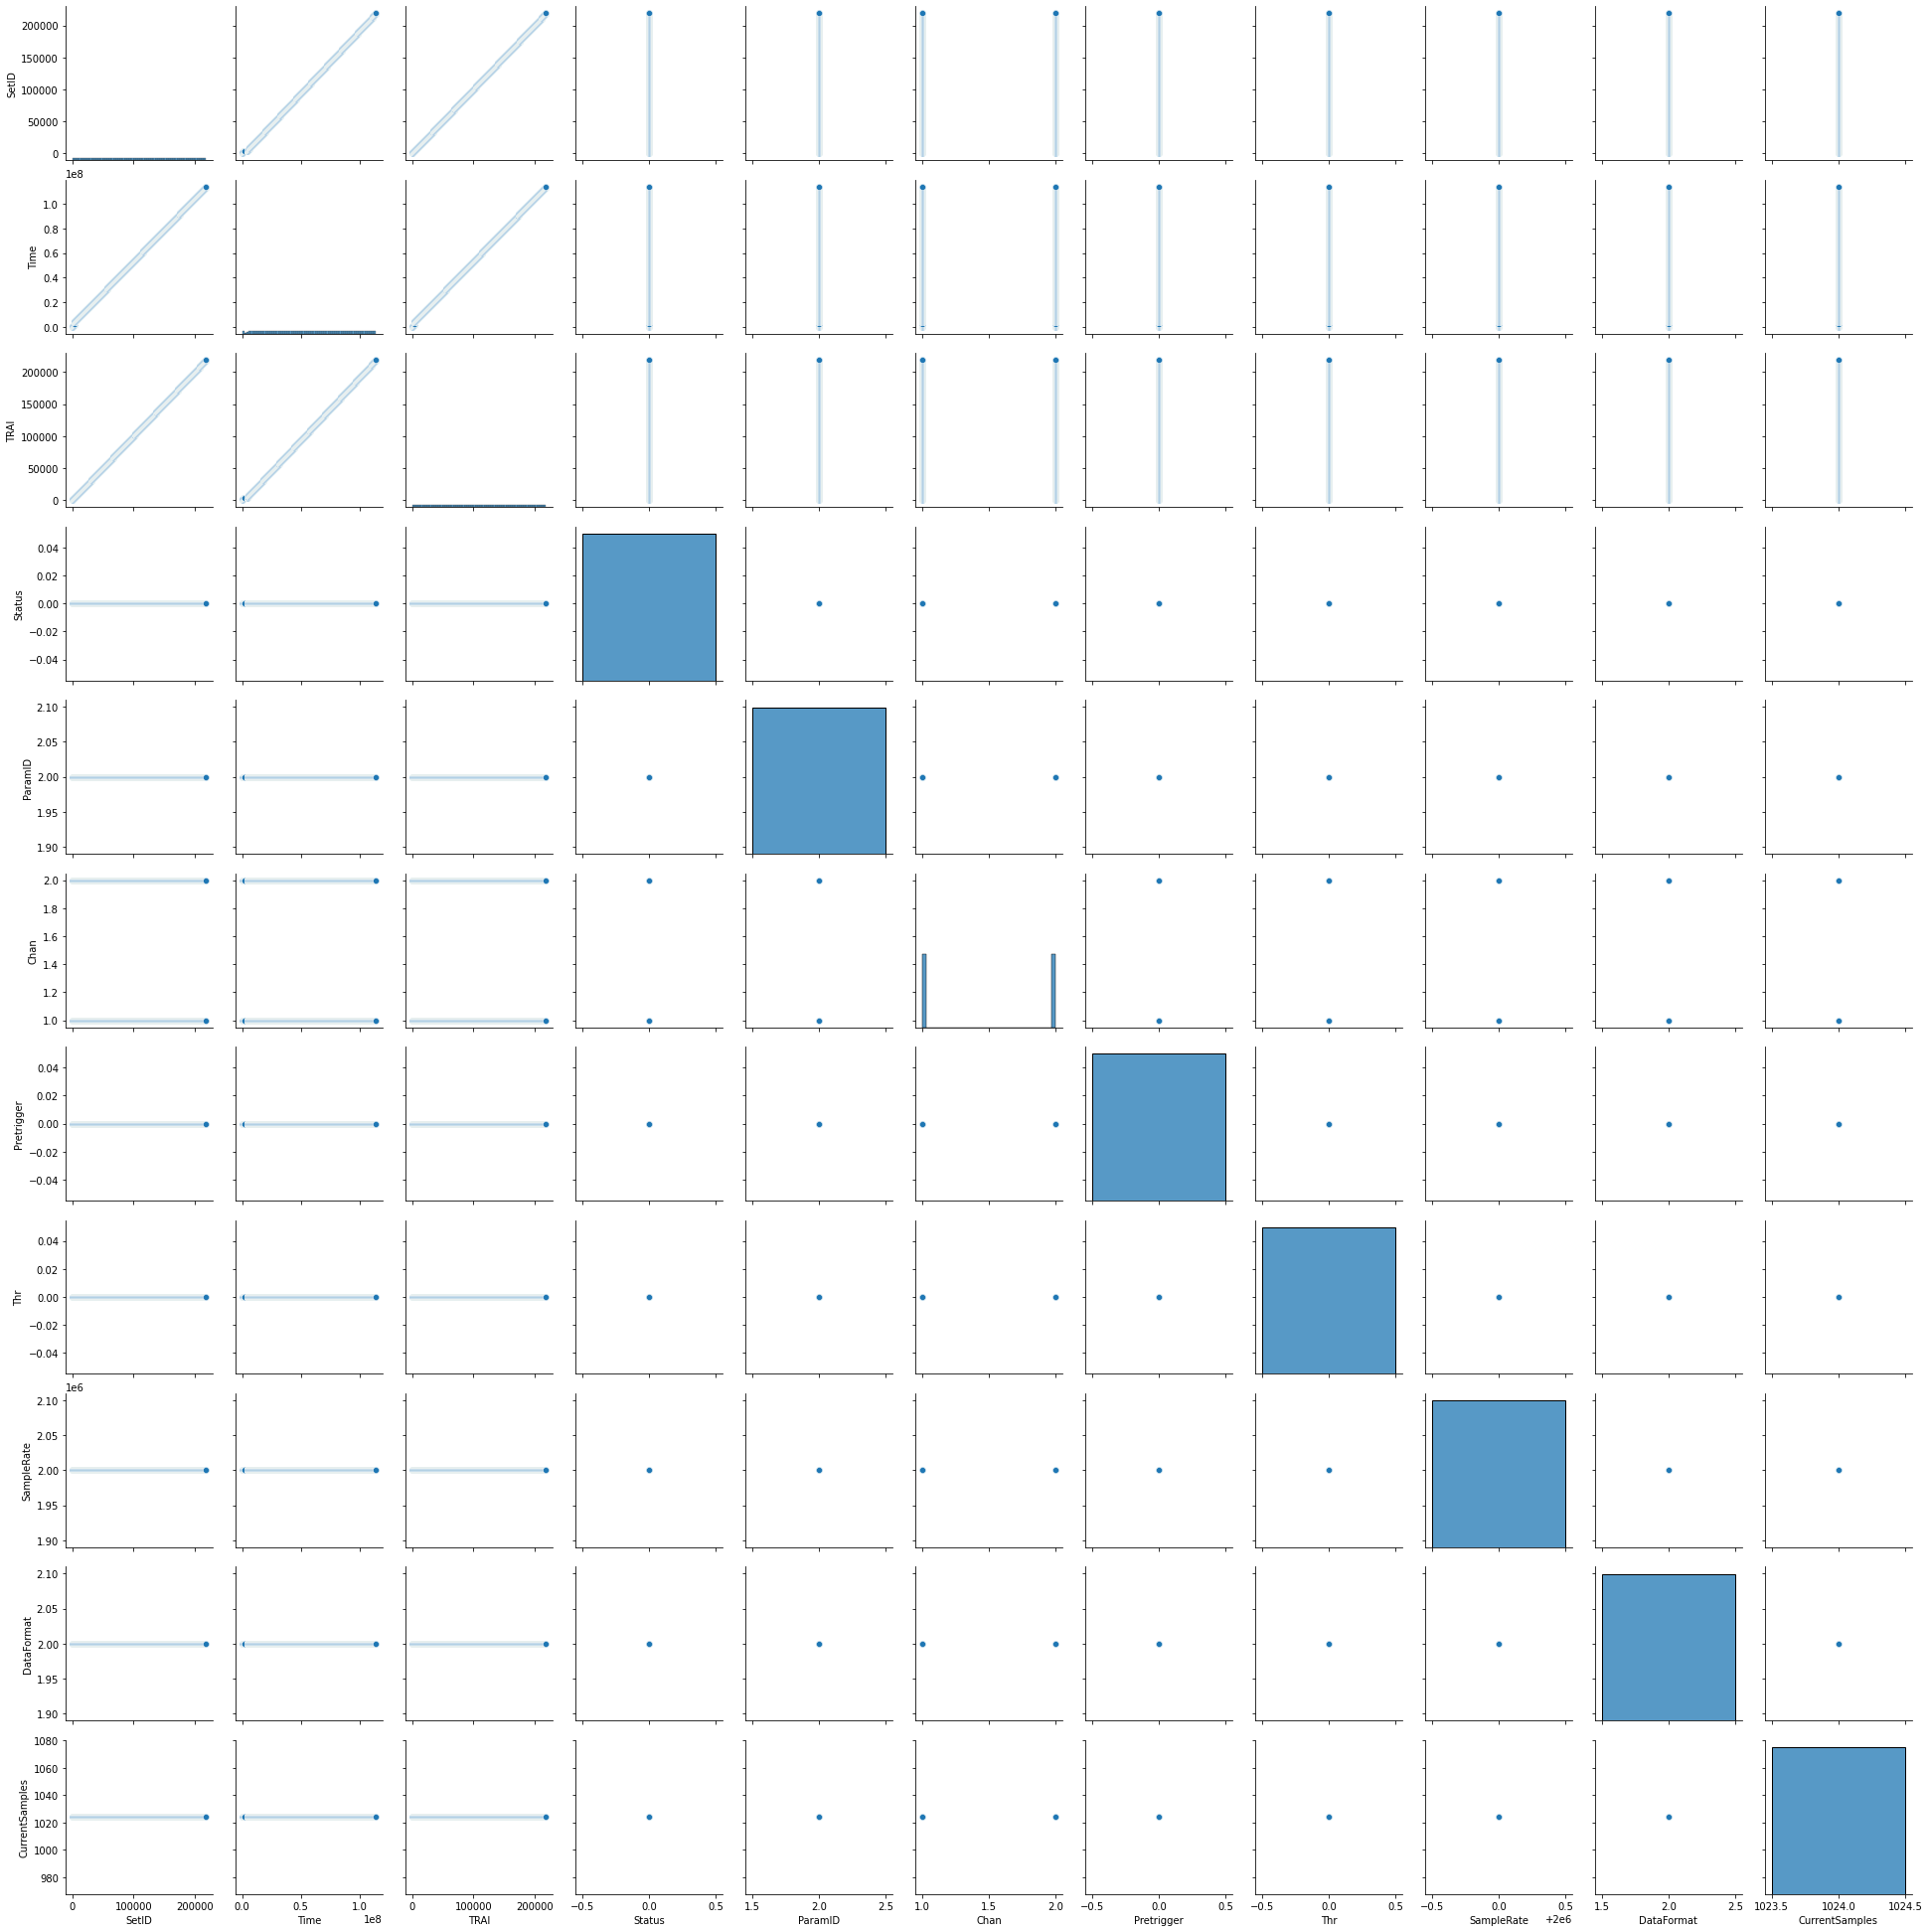

In [76]:
sns.pairplot(final_dataset)

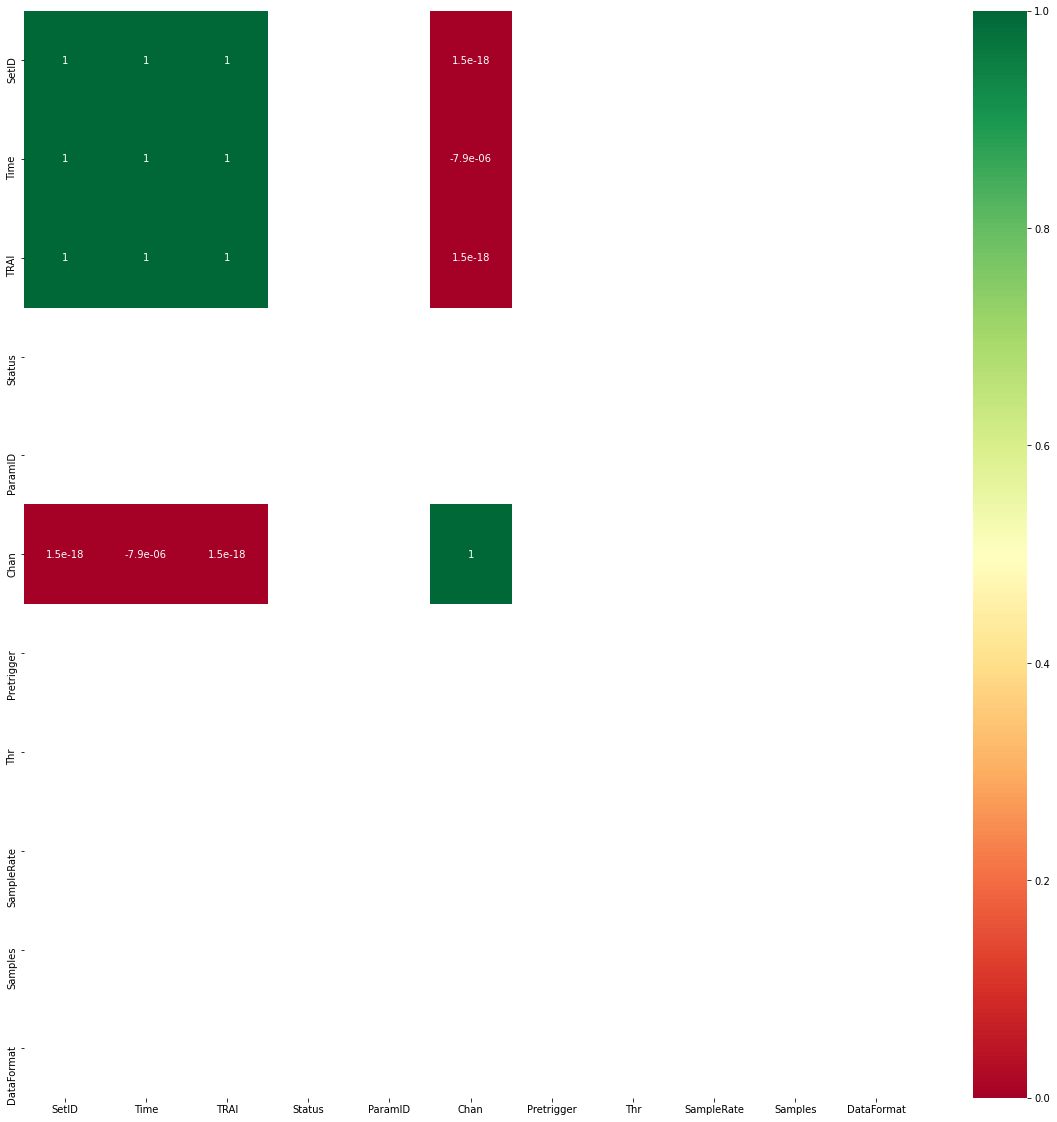

In [80]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [81]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [87]:
X['Time'].unique()
X['TRAI'].unique()

array([     1,      2,      3, ..., 218859, 218860, 218861])

In [88]:
X.head()

,Time,TRAI,Status,ParamID,Chan,Pretrigger,Thr,SampleRate,DataFormat,CurrentSamples
0,0,1,0,2,1,0,0,2000000,2,1024
1,0,2,0,2,2,0,0,2000000,2,1024
2,1024,3,0,2,1,0,0,2000000,2,1024
3,1024,4,0,2,2,0,0,2000000,2,1024
4,2048,5,0,2,1,0,0,2000000,2,1024


In [89]:
y.head()

0    1
1    2
2    3
3    4
4    5
Name: SetID, dtype: int64

In [90]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [91]:
print(model.feature_importances_)

[4.58305135e-01 5.41694865e-01 0.00000000e+00 0.00000000e+00
 2.64948999e-11 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


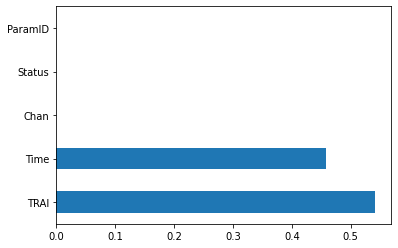

In [92]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
regressor=RandomForestRegressor()

In [96]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 0, stop = 1200000, num = 12)]
print(n_estimators)

[0, 109090, 218181, 327272, 436363, 545454, 654545, 763636, 872727, 981818, 1090909, 1200000]


In [97]:
from sklearn.model_selection import RandomizedSearchCV

In [4]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 0, stop = 1200000, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [7]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [0, 109090, 218181, 327272, 436363, 545454, 654545, 763636, 872727, 981818, 1090909, 1200000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [6]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

NameError: ignored

In [102]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=872727, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
rf_random.best_params_

In [ ]:
rf_random.best_score_

In [ ]:
predictions=rf_random.predict(X_test)

In [ ]:
sns.distplot(y_test-predictions)

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics

In [ ]:
rint('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)